# Bibliotecas

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Funções Auxiliares

# Carregando os Dados

In [2]:
df = pd.read_csv("./df_ex1.csv")

In [3]:
df.head()

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,prazoMedioRecebimentoVendas,titulosEmAberto,percentualRisco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,...,faturamentoBruto,margemBruta,custos,anoFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,kmeans
0,IYZA05872767332466,2,0.000000,0,0.0,0.283019,437853.0,272388.0,450614.0,178225.0,...,624350.0,-3319.0,-431401.0,2008.0,40000.0,False,True,0.0,10800.0,3
1,MJEK50274612793018,7,0.387733,63,10368.0,0.283019,382348.0,890140.0,627034.0,460656.0,...,1177807.0,0.0,0.0,2012.0,50000.0,False,True,1.0,44000.0,1
2,FECA48063802482890,19,0.000000,0,0.0,0.320755,714851.0,188269.0,728846.0,1402031.0,...,1249651.0,302367.0,2183996.0,2008.0,100000.0,False,True,0.0,165850.0,3
3,PMQC81082938911940,28,0.000000,0,0.0,0.358491,95762.0,293393.0,4786692.0,4493298.0,...,5368371.0,1346068.0,2072196.0,2012.0,500000.0,False,True,0.0,194114.0,3
4,OGWM99265986867408,0,0.385918,0,0.0,0.283019,911113.0,509051.0,926368.0,451271.0,...,572776.0,0.0,0.0,2014.0,80000.0,False,True,1.0,63000.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 1523 non-null   object 
 1   maiorAtraso                  1523 non-null   int64  
 2   margemBrutaAcumulada         1523 non-null   float64
 3   prazoMedioRecebimentoVendas  1523 non-null   int64  
 4   titulosEmAberto              1523 non-null   float64
 5   percentualRisco              1523 non-null   float64
 6   ativoCirculante              1523 non-null   float64
 7   passivoCirculante            1523 non-null   float64
 8   totalAtivo                   1523 non-null   float64
 9   totalPatrimonioLiquido       1523 non-null   float64
 10  endividamento                1523 non-null   float64
 11  duplicatasAReceber           1523 non-null   float64
 12  estoque                      1523 non-null   float64
 13  faturamentoBruto  

In [5]:
x = df.drop(['cnpjSemTraco', 'kmeans'], axis=1)
y = df.kmeans

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
dtf = DecisionTreeClassifier(random_state=42)
clf_tree = dtf.fit(x_train, y_train)

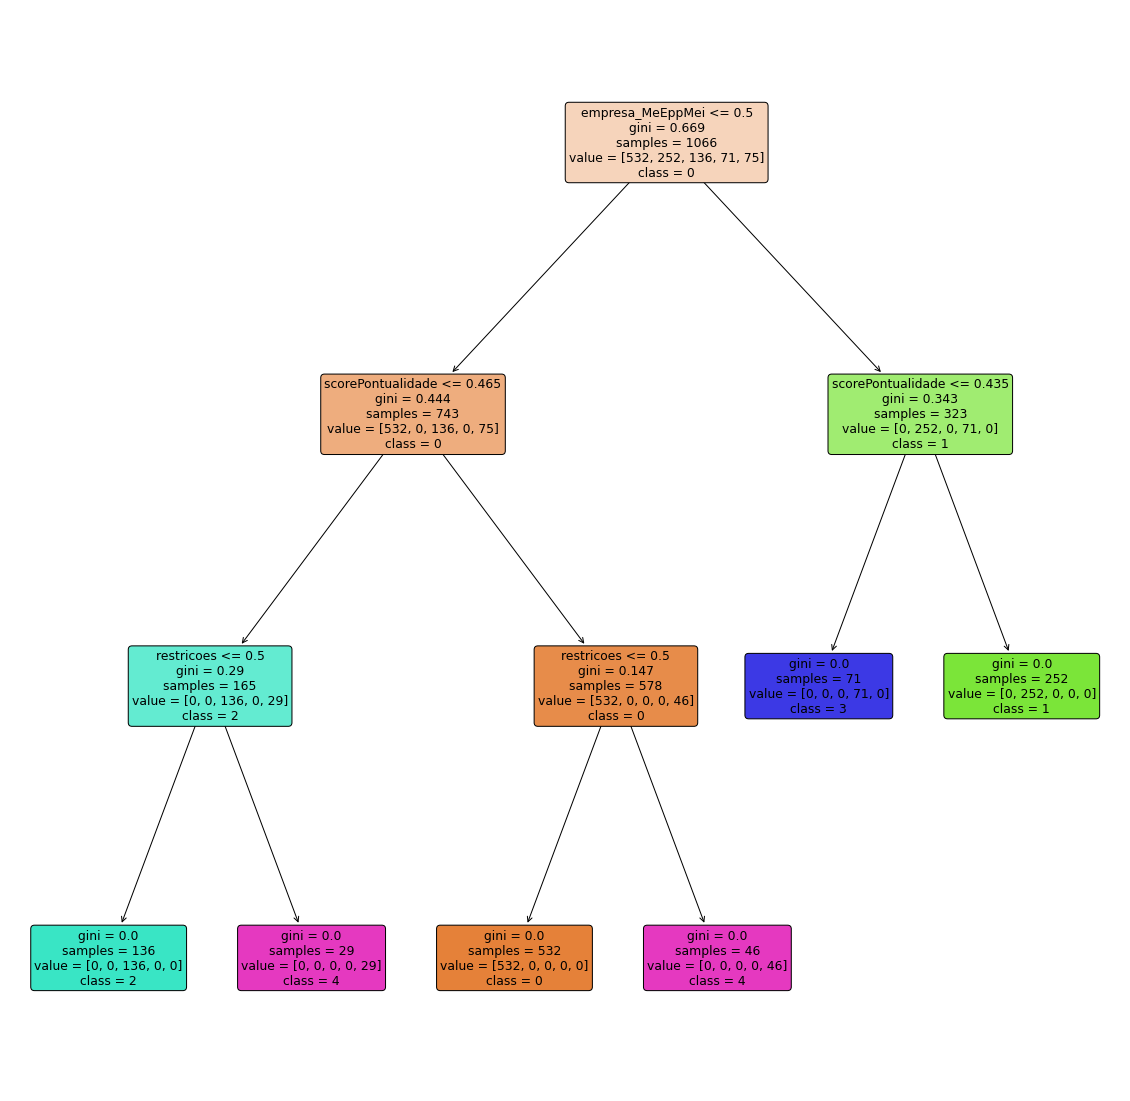

In [8]:
fig = plt.figure(figsize=(20,20))
tree = plot_tree(clf_tree, feature_names=x_train.columns, rounded=True, class_names=['0', '1', '2', '3', '4'], filled=True)

In [9]:
clf_tree.score(x_test, y_test)

0.9978118161925602

In [ ]:
df_teste = pd.read_csv("./df_pre_processado.csv")

df_teste.shape

In [ ]:
df_teste.drop(['cnpjSemTraco', 'valorAprovado', 'valorSolicitado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao',
         'razaoSocial', 'nomeFantasia', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses'], axis=1, inplace=True)

In [ ]:
numero = np.random.random_integers(df_teste.shape[0])
amostra = df_teste.iloc[numero,:]
amostra


In [ ]:
df_k = df[df.kmeans == 0]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

In [ ]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

In [ ]:
df_k = df[df.kmeans == 1]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

In [ ]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

In [ ]:
df_k = df[df.kmeans == 2]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

In [ ]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

In [ ]:
df_k = df[df.kmeans == 3]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

In [ ]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))

In [ ]:
df_k = df[df.kmeans == 4]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

In [ ]:
amostra = np.array(amostra).reshape(1,-1)
print(clf_tree.predict(amostra))